<a href="https://colab.research.google.com/github/samyukthagopalsamy/HousingPricePrediction_OutreachyContribution/blob/main/Mozilla_Outreachy_by_Samyuktha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initial contribution**: Analyzing the property sales dataset to find the single field which best describes the **SalePrice** field.<br>
**Second contribution:**  Choosing the regression model technique to predict SalePrice
 
 By **[Samyuktha Gopalsamy](https://github.com/samyukthagopalsamy)**
                                    

# Importing necessary packages

In [ ]:
from google.colab import files # upload data file from local computer
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', 100, 'display.max_columns', 100) # display 100 rows and columns from DataFrame
import numpy as np # linear algebra

# Visualizations tools
import matplotlib.pyplot as plt
import seaborn as sns

#Processing
import phik
from phik import resources, report
from scipy.stats import probplot, skew, zscore

#Import Scikit-learn(open source machine learning library)
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from vecstack import stacking #Package for stacking models

In [ ]:
#reading the initial_contribution dataset(csv file) into DataFrame
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [ ]:
dataset = pd.read_csv('dataset.csv')

In [ ]:
print("The dataset has", dataset.shape[1], "variables describing", dataset.shape[0], "property sales in locations within Ames city limits")

The dataset has 81 variables describing 1460 property sales in locations within Ames city limits


I can see **all the columns** in the dataset and get a **quick glance** at **null values** and the **data types** (e.g. float, int, object) for our features using the DataFrame **info()** method

In [ ]:
dataset.info() #concise summary of our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The variables are a mix of **43 categorical** (nominal and ordinal), **continuous**(basement, main living area measurements) and **discrete** types(like number of kitchens, bedrooms, and bathrooms). 

Some variables like PoolQC, Alley and MiscFeature have a lot of null(missing) values.

There is a memory usage of 924 KB for the entire dataset.

In [ ]:
print("The dataset includes property sales occurred between", dataset['YrSold'].min(), "and", dataset['YrSold'].max())

The dataset includes property sales occurred between 2006 and 2010


In [ ]:
print("Median Sales Price of the houses is $",int(dataset.SalePrice.median()))
print("Average(mean) Sales Price of the houses is $",int(dataset.SalePrice.mean()))

Median Sales Price of the houses is $ 163000
Average(mean) Sales Price of the houses is $ 180921


In [ ]:
dataset.drop('Id', axis = 1, inplace = True) #dropping Id column, it's unnecessary for  the analysis and prediction (Id has unique values)

In [ ]:
dataset.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
619,60,RL,85.0,12244,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,VinylSd,VinylSd,Stone,226.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,871,Unf,0,611,1482,GasA,Ex,Y,SBrkr,1482,780,0,2262,1,0,2,1,4,1,Gd,10,Typ,2,Gd,Attchd,2003.0,Fin,3,749,TA,TA,Y,168,0,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,305000
806,80,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1967,1967,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,Av,ALQ,400,Rec,480,100,980,GasA,Gd,Y,SBrkr,980,0,0,980,0,0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1967.0,Fin,1,384,TA,TA,Y,68,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,135500
869,60,RL,80.0,9938,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,MetalSd,MetalSd,BrkFace,246.0,Gd,TA,PConc,Gd,TA,No,GLQ,750,Unf,0,300,1050,GasA,Ex,Y,SBrkr,1062,887,0,1949,1,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1993.0,Fin,2,574,TA,TA,Y,156,90,0,0,0,0,NaN,GdPrv,NaN,0,6,2010,WD,Normal,236000
635,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,None,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,110,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
383,45,RH,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1.5Unf,6,3,1928,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Fa,Fa,No,Unf,0,Unf,0,784,784,GasA,TA,N,FuseA,784,0,0,784,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,360,Fa,Fa,N,0,0,91,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,76000


**It contains data of almost every characteristic of different houses that were sold Ames, Iowa.**<br>
There are 80 variables(excluding Index Id) that are directly related to property sales. <br>

These variables describe the physical attributes of a property, like
1. When was the property built, renovated?
2. Which month, year was the property sold?
3. How big is the basement, garage, living area?
4. How many bedrooms, bathrooms are there?

In [ ]:
# function to describe the field dtype, missing and unique values
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Sample Value 1'] = df.iloc[0].values
    summary['Sample Value 2'] = df.iloc[1].values
    return summary

description(dataset)

,Name,dtypes,Missing,Uniques,Sample Value 1,Sample Value 2
0,MSSubClass,int64,0,15,60,20
1,MSZoning,object,0,5,RL,RL
2,LotFrontage,float64,259,110,65,80
3,LotArea,int64,0,1073,8450,9600
4,Street,object,0,2,Pave,Pave
5,Alley,object,1369,2,NaN,NaN
6,LotShape,object,0,4,Reg,Reg
7,LandContour,object,0,4,Lvl,Lvl
8,Utilities,object,0,2,AllPub,AllPub
9,LotConfig,object,0,5,Inside,FR2


# Handling missing values in the dataset:
I’ll need to deal with the null values. First, let me visualize the missing values in the dataset

###Visualizing missing data

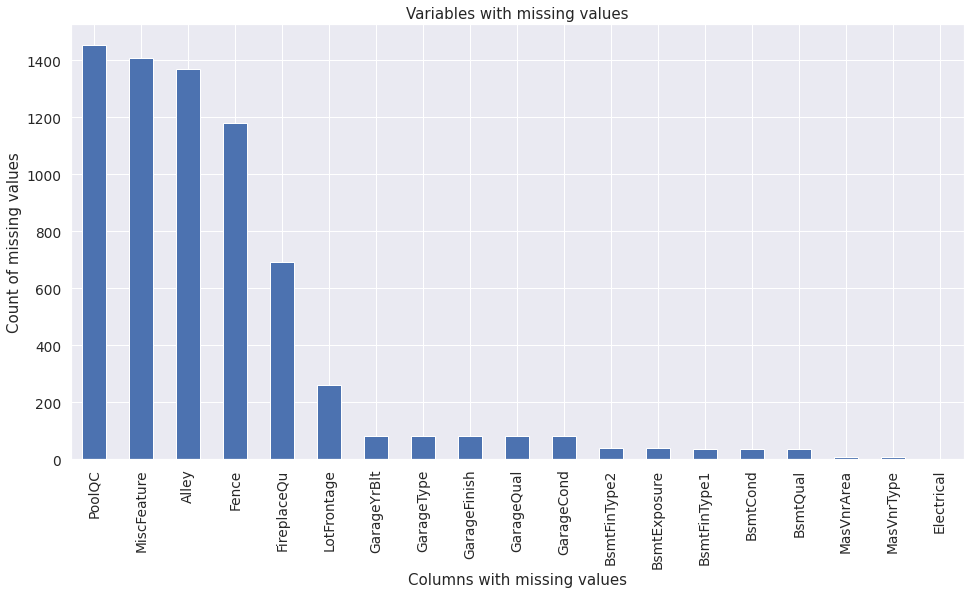

In [ ]:
def plot_missing(df):
    # Find columns having missing values and count
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True, ascending=False)
    
    # Plot missing values by count 
    missing.plot.bar(figsize=(16,8))
    plt.title('Variables with missing values')
    plt.xlabel('Columns with missing values')
    plt.ylabel('Count of missing values')
    
plot_missing(dataset)

I can see that there are many missing values in a number of columns like **[PoolQC, MiscFeature, Alley, Fence]**, more than 95% properties don't have pool quality values

If there is numeric data with a normal distribution, I can impute mean or median values for the null values. However, the dataset has few null values in the numeric data. <br>
**Almost all of the null values are categorical variables**.

###Analyzing influence of missing categoricals on SalePrice

**Plotting columns with missing categorical variables against SalePrice to see how these features influence the Sale Price of a house/property.**


Using **seaborn**, a Python library that is built on top of matplotlib and has support for NumPy and pandas

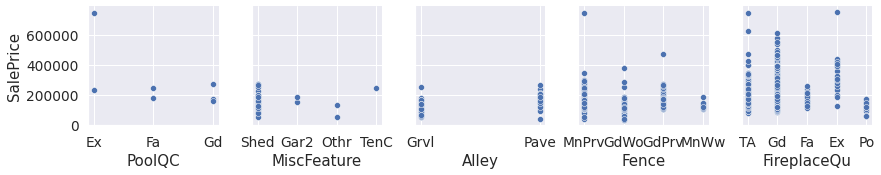

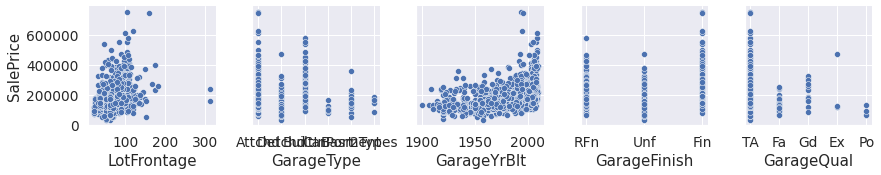

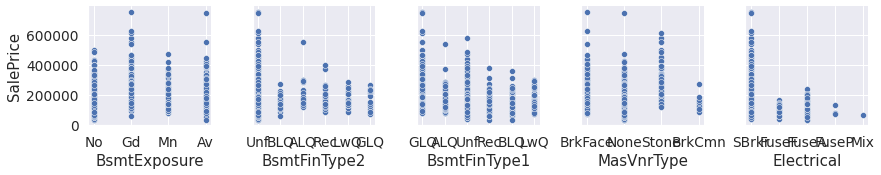

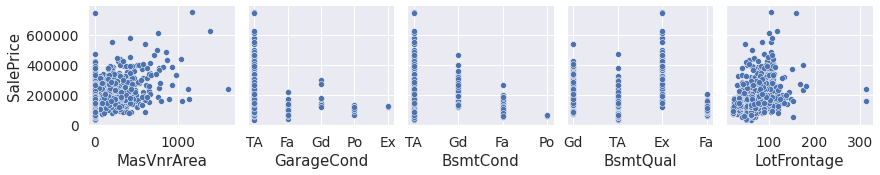

In [ ]:
sns.pairplot(x_vars = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], y_vars = 'SalePrice', data = dataset)
plt.show()
sns.pairplot(x_vars = ['LotFrontage','GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual'],  y_vars = 'SalePrice', data = dataset)
plt.show()
sns.pairplot(x_vars = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'Electrical'], y_vars = 'SalePrice', data = dataset)
plt.show()
sns.pairplot(x_vars = ['MasVnrArea', 'GarageCond', 'BsmtCond', 'BsmtQual', 'LotFrontage'], y_vars = 'SalePrice', data = dataset)
plt.show()

I can see that **GarageQual, GarageCond, BsmtCond, BsmtQual, LotFrontage, MasVnrArea** and **Electrical** have **influence on salePrice**. Hence, I am **not dropping** those variables <br>

Also some of them are collinear with other available features.

Features such as **PoolQC, MiscFeature, Alley** and **Fence** are **missing** in most houses (>95%) <br>
Also, features such as BsmtExposure, BsmtFinType2, BsmtFinType1, and MasVnrType don't seem to influence the saleprice
<br>
**Hence I decided to drop those columns**

###Dropping unnecessary categorical columns

In [ ]:
dataset.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish'], axis = 1, inplace = True)

In [ ]:
print(len(dataset.loc[dataset['PoolArea'] == 0]), "properties don't have pool as indicated by 0 sqft. pool area")
print(len(dataset.loc[dataset['Fireplaces'] == 0]), "properties don't have a fireplace")
print(len(dataset.loc[dataset['GarageCars'] == 0]), "properties don't have a garage as indicated by zero car capacity")
print(len(dataset.loc[dataset['TotalBsmtSF'] == 0]), "properties don't have a basement as indicated by 0 sqft. basement area")

1453 properties don't have pool as indicated by 0 sqft. pool area
690 properties don't have a fireplace
81 properties don't have a garage as indicated by zero car capacity
37 properties don't have a basement as indicated by 0 sqft. basement area


I see that variables related to garage [GarageQual, GarageCond] are null for properties that don't have a Garage.

Also variables related to basement [BsmtQual, BsmtCond] are null for properties that don't have a basement.

###Imputation with mean and NA

In [ ]:
garage_cols = ['GarageQual','GarageCond']
dataset[garage_cols] = dataset[garage_cols].fillna('NA') # imputing missing garage values with NA (No Garage)

basement_cols = ['BsmtQual', 'BsmtCond']
dataset[basement_cols] = dataset[basement_cols].fillna('NA') #imputing missing basement values with NA (No Basement)

# since only one property has missing Electrical value, hence imputing the most common Electrical system
dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

dataset['MasVnrArea'].fillna(0, inplace = True)
dataset['LotFrontage'].fillna(0, inplace = True)

In [ ]:
print("The total number of missing values after imputation/dropping columns is", dataset.isnull().sum().sum())

The total number of missing values after imputation/dropping columns is 0


In [ ]:
dataset.isnull() # after handling all null values by imputation or dropping columns, there is no missing values/fields

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [ ]:
dataset.describe(include ="all") #descriptive statistics of the DataFrame columns.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1460.000000,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,NaN,4,5,6,5,5,NaN,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,6,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,TA,TA,NaN,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,NaN,906,1282,647,649,1311,NaN,NaN,NaN,NaN,1428,741,1365,1335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,57.623288,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,103.117123,NaN,NaN,NaN,NaN,NaN,443.639726,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,34.664304,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,180.731373,NaN,NaN,NaN,NaN,NaN,456.098091,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,0.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,42.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1954.000000,1967.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,223.000000,795.750000,NaN,NaN,NaN,NaN,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,1.000000,334.500000,NaN,NaN,NaN,0.000000

# Understanding the dataset:

In [ ]:
categorical = [col for col in dataset.columns if dataset.dtypes[col] =='object']
numericals  = [col for col in dataset.columns if dataset.dtypes[col] !='object']


In order to visualize all the categorical variables in the dataset, I loop through pandas series to create subplots.

Using **plt.subplots**, to create a figure with a grid of 6 rows and columns. Then iterating over every categorical variable to create a countplot with seaborn.

##**Countplots for each of the categorical variables**

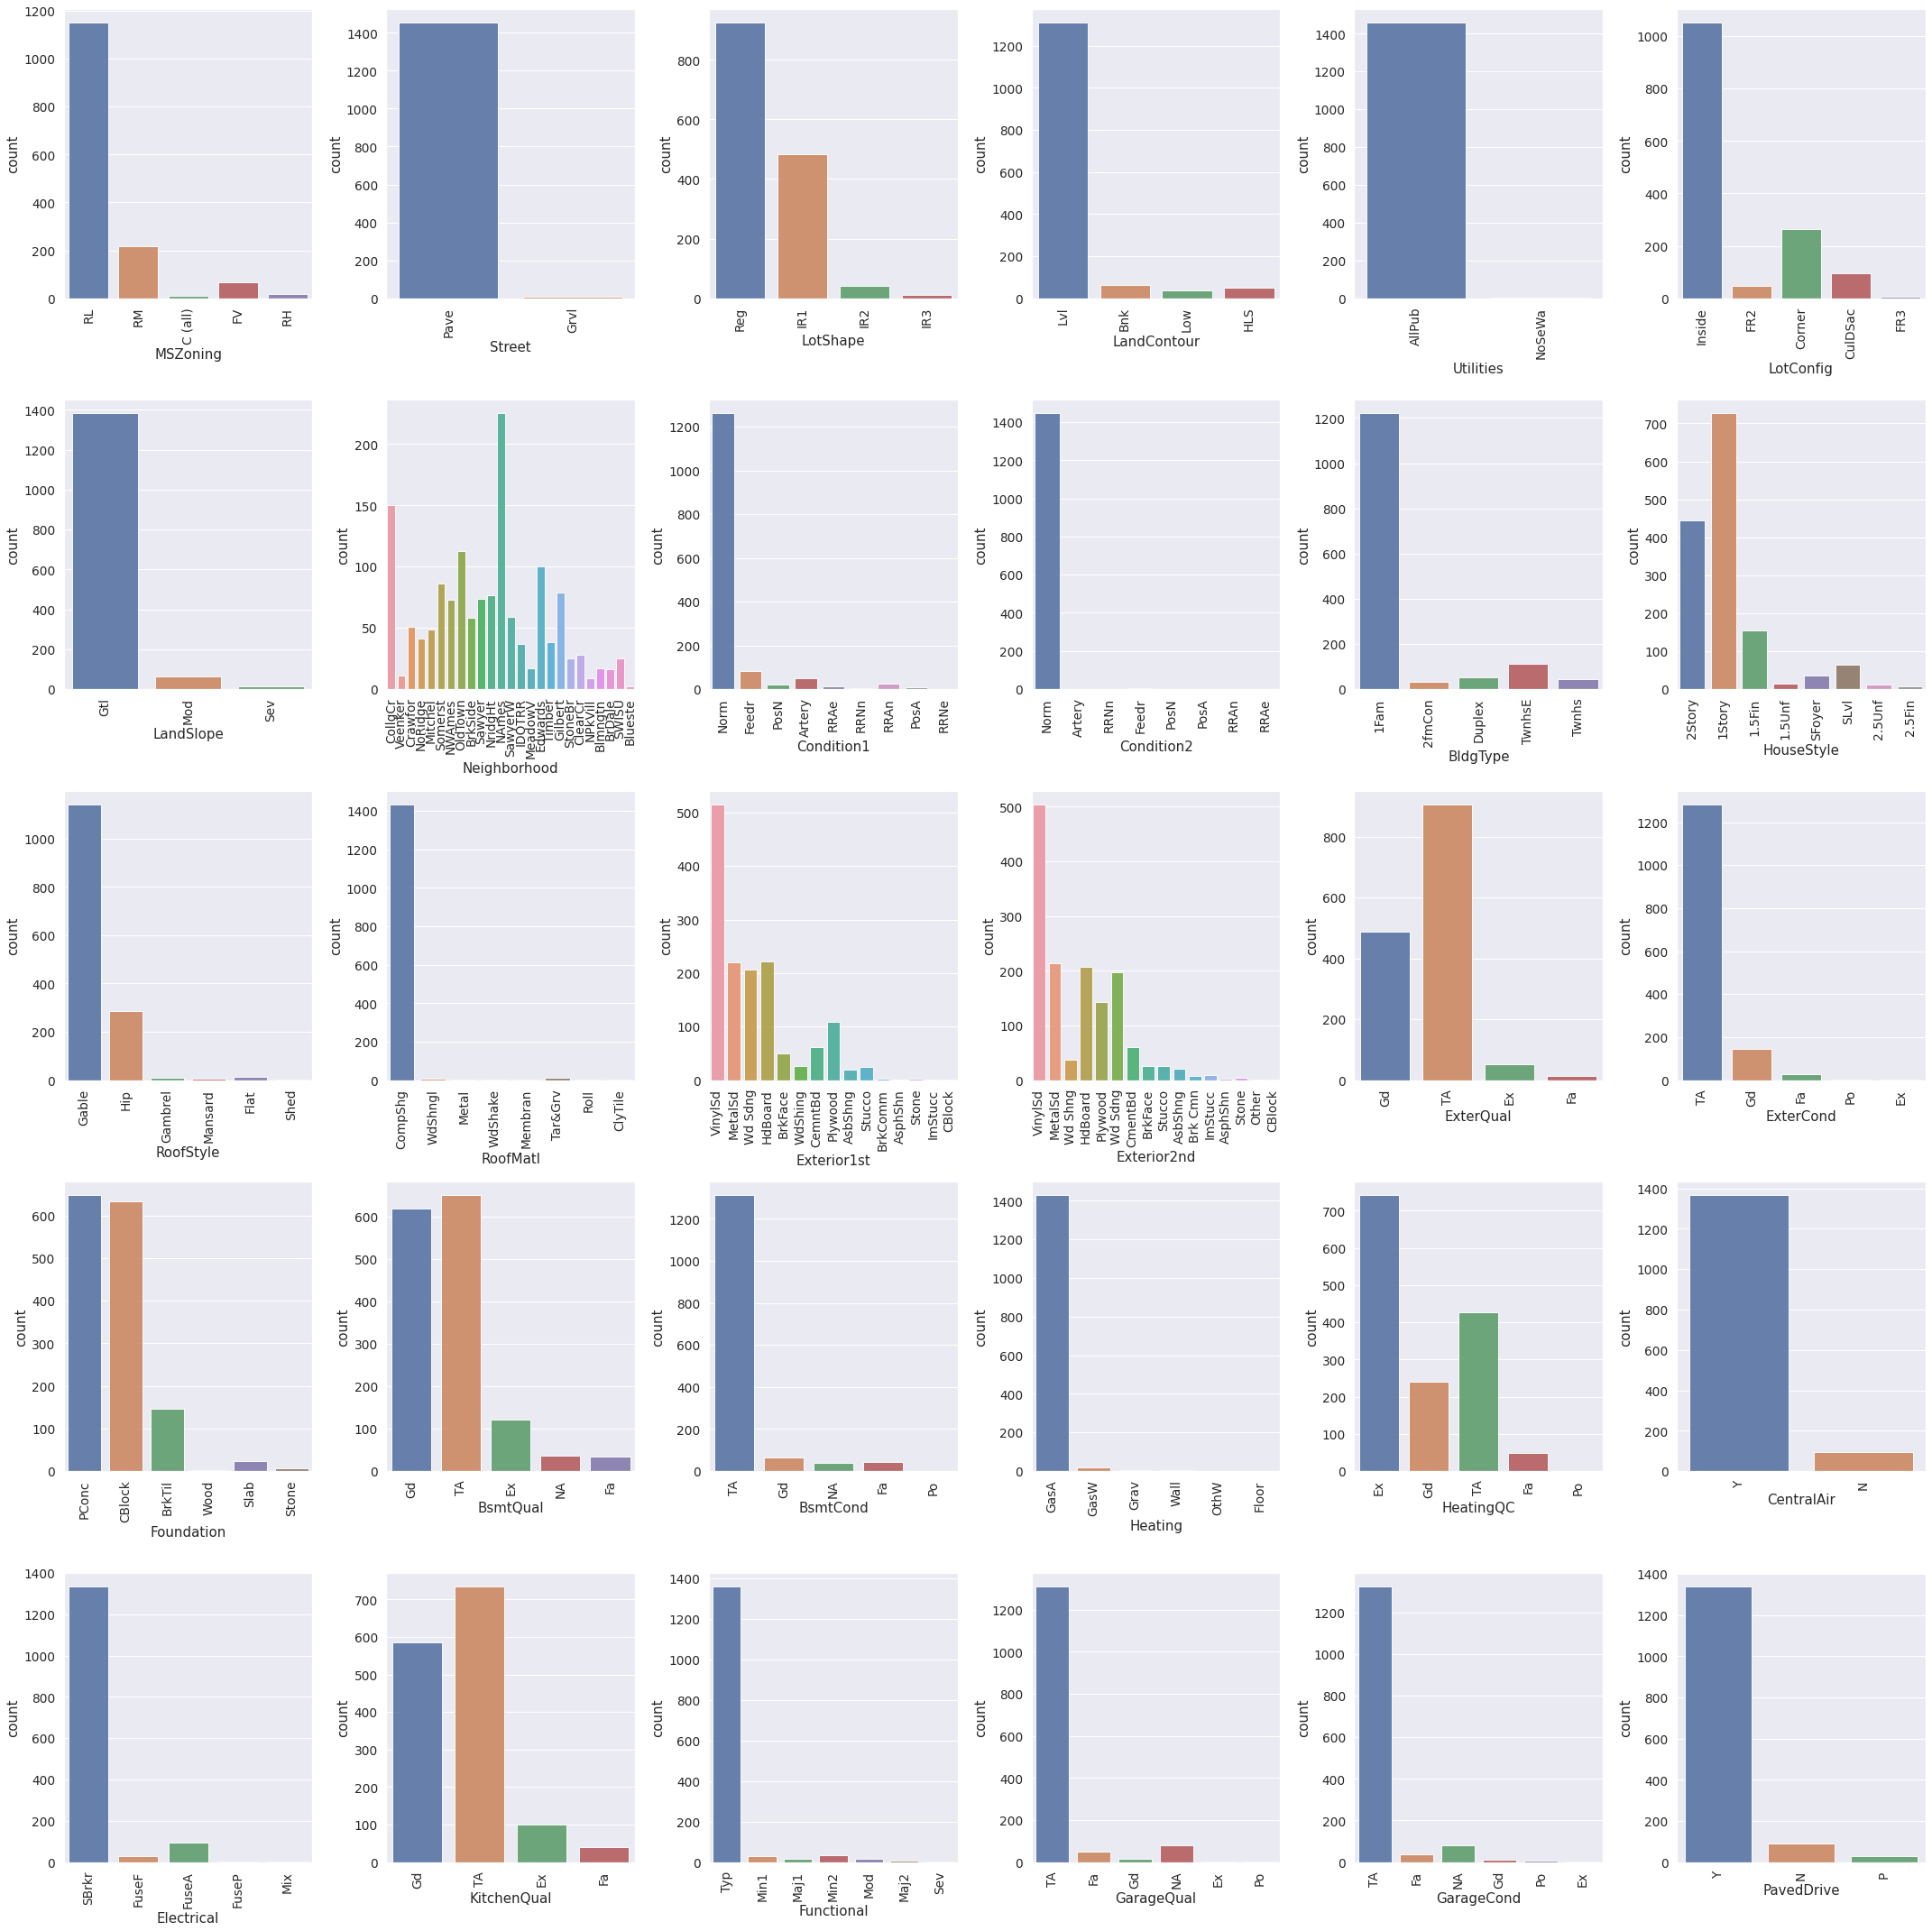

In [ ]:
fig, axes = plt.subplots(round(len(categorical) / 6), 6, figsize=(30, 30))
for i, ax in enumerate(fig.axes):
    if i < len(categorical):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x = categorical[i], alpha=0.9, data = dataset, ax = ax)

fig.tight_layout()

**Following observations can be made from visually analyzing the data:**

*   Most houses (78.8%) have RL	**Residential Low Density** zoning classification
*   Most streets (99.6%) are **Paved**, most lots are in regular shape
*   Most properties (89.9%) have **Near Flat/Level** land contour
*   Conditions 1 and 2(Proximity to various conditions) are Norm(normal) for most properties (90%)
*   Quality(ExterQual, BsmtQual, HeatingQC etc) and Condition(GarageCond etc) variables are **TA**(Typical/Average) for most of the properties.
* Only one property doesn't have All Public Utilities
* Majority of houses (98.2%) have **Standard (Composite) Shingle** as roof material



**Most of the categorical variables, contain only a few labels** -> do not have to deal with high cardinality

Variables with high cardinality(larger number of unique labels) may affect the performance of some machine learning models, for example trees.

## Histograms for each numerical variables
**Histograms helps in understanding the distribution and dispersion of numerical data**

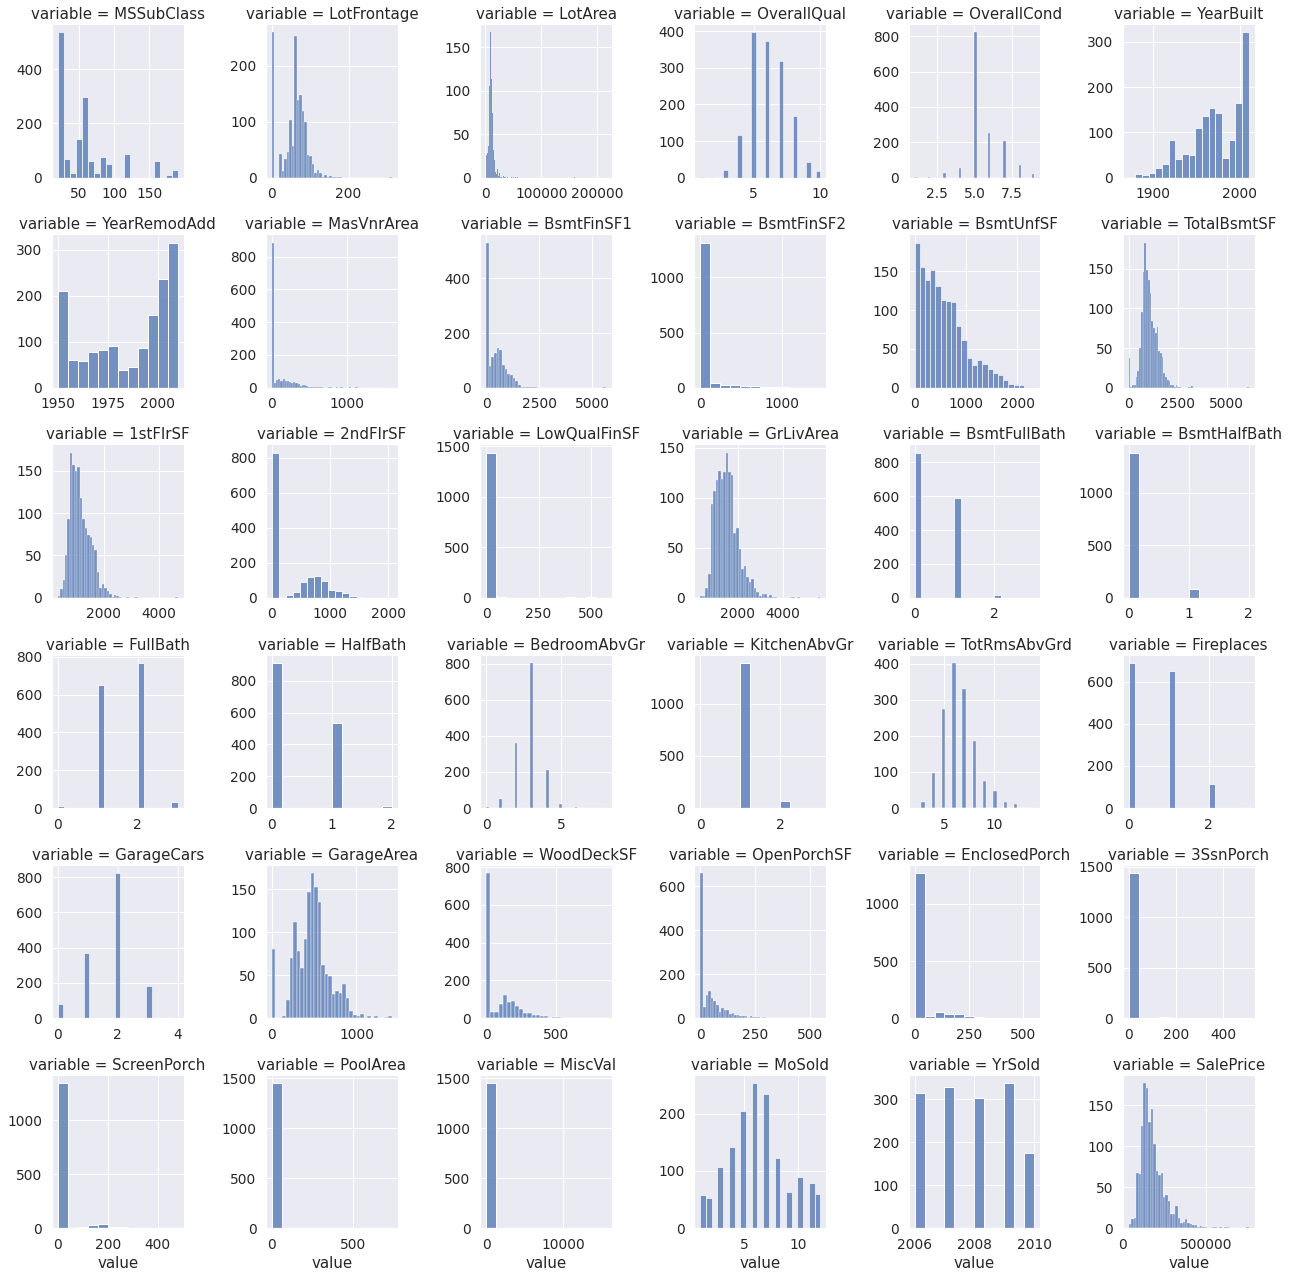

In [ ]:
fig = pd.melt(dataset, value_vars = numericals)
grid = sns.FacetGrid(fig, col = 'variable', col_wrap = 6, sharex = False, sharey = False)
grid = grid.map(sns.histplot, "value")

* I can infer that most variables (LotFrontage, LotArea, BasementArea, SalePrice etc) are all **positively skewed** -> Would require **Log tranformation**
* 1stFlrSF (square footage of the first floor) is heavily skewed right
* Most houses only have one floor, and have 3 Bedrooms. 

## Finding which variable describes SalePrice field


**Correlation** quantifies the relationship between *numerical features* and helps to understand the dependencies between features.

The **Pearson's correlation** coefficient is a measure of **linear correlation** between two variables. It's value lies between -1 and +1, -1 indicating total negative linear correlation, 0 indicating no linear correlation and 1 indicating total positive linear correlation.<br>

**The problem with Pearson Correlation for analysis is that the variables are needed to be continuous, normally distributed and no outliers should be in the dataset. Since our dataset contradicts all these requirements using Pearson correlation is not a good idea.**

### Spearman correlation

The **Spearman's rank correlation coefficient** is a measure of **monotonic correlation** between two variables, and is therefore better in catching nonlinear monotonic correlations than Pearson's r. It's value lies between -1 and +1, -1 indicating total negative monotonic correlation, 0 indicating no monotonic correlation and 1 indicating total positive monotonic correlation.

**Spearman(Spearman rank correlation)** works good for ordinal data and handles non-linearity better than a Pearson standard correlation coefficient

As Spearman correlation is non-parametric, it does not assume normality in the data.<br>
It gives an univariate idea of important features to the target SalePrice

**Using seaborn's heatmap function to plot the Spearman correlation matrix array as a heat map.**


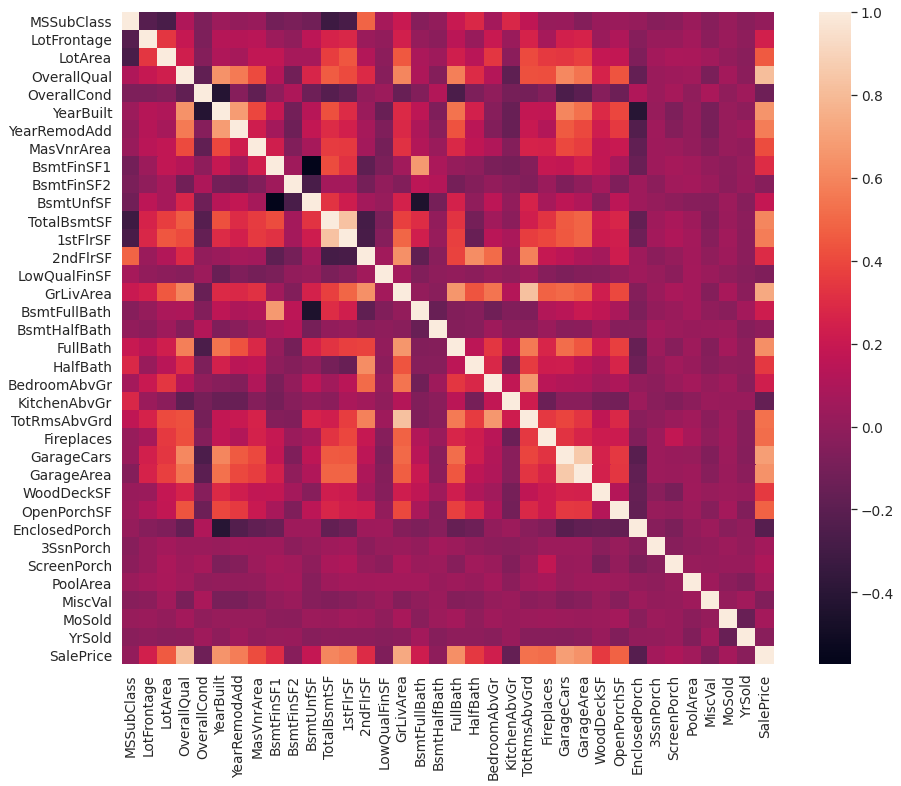

In [ ]:
correlation_matrix = dataset.corr(method = 'spearman') #using Spearman standard correlation coefficient
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(correlation_matrix, vmax=1 , square=True)

**Considering 15 most correlated columns among the quantitative variables**

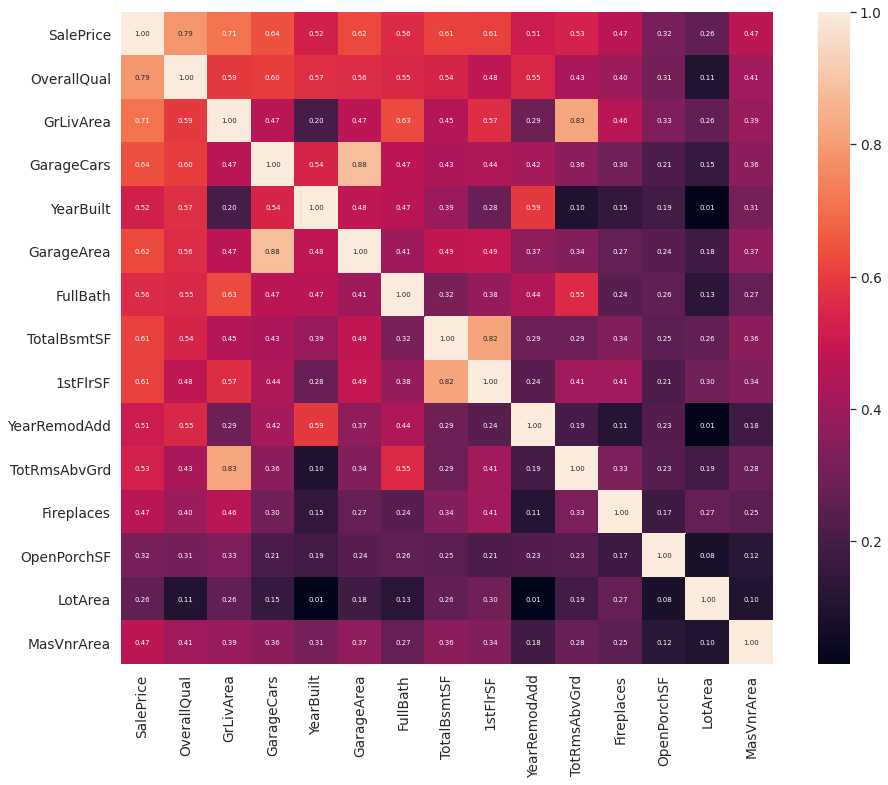

In [ ]:
correlation_num = 15
correlation_cols = correlation_matrix.nlargest(correlation_num,'SalePrice')['SalePrice'].index
correlation_mat_sales = np.corrcoef(dataset[correlation_cols].values.T)
sns.set(font_scale=1.25)
fig,ax = plt.subplots(figsize=(16,12))
sns.heatmap(correlation_mat_sales, cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':7}, yticklabels=correlation_cols.values, xticklabels=correlation_cols.values)

I can visually infer from the correlation heatmap that features such as **OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF** fields decribe SalePrice field better

That means these features play an important role in determining the SalePrice of a house. Similarly a lot can be inferred just by looking at the heatmap

### Kendall correlation 

Similar to Spearman's rank correlation coefficient, the **Kendall rank correlation coefficient** measures **ordinal association** between two variables. It's value lies between -1 and +1, -1 indicating total negative correlation, 0 indicating no correlation and 1 indicating total positive correlation.

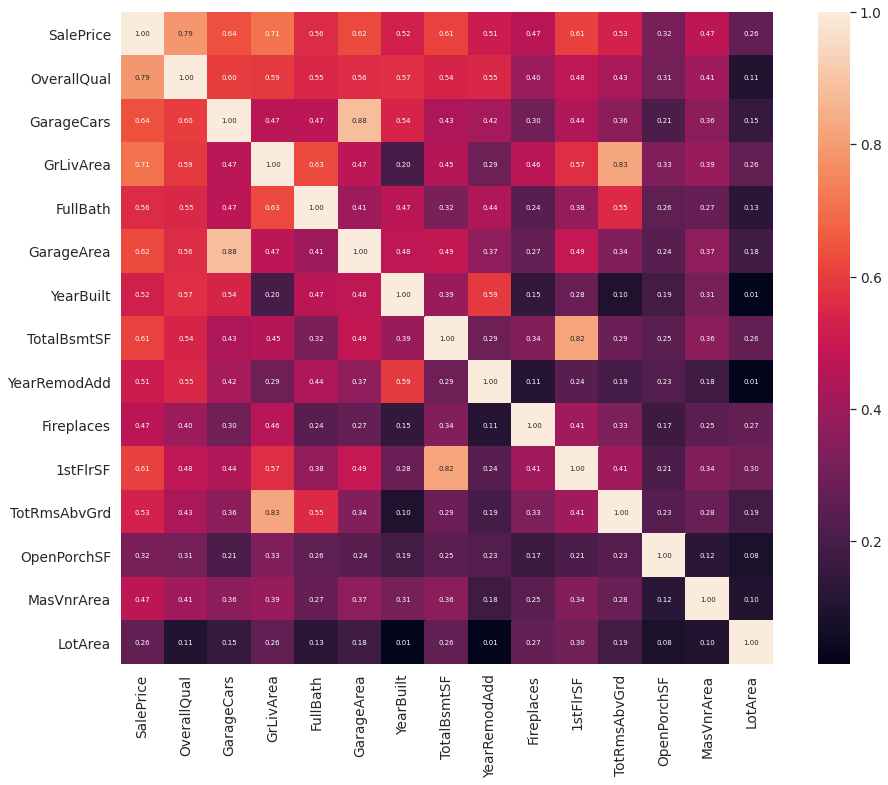

In [ ]:
correlation_matrix = dataset.corr(method = 'kendall') #using Kendall standard correlation coefficient
correlation_cols = correlation_matrix.nlargest(15,'SalePrice')['SalePrice'].index
correlation_mat_sales = np.corrcoef(dataset[correlation_cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(correlation_mat_sales, cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':7}, yticklabels=correlation_cols.values, xticklabels=correlation_cols.values)

###Phik Correlation 
Phik is a new and practical correlation coefficient that works consistently between **categorical, ordinal and interval** variables, captures **non-linear dependency** and reverts to the Pearson correlation coefficient in case of a bivariate normal input distribution. 

interval columns not set, guessing: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


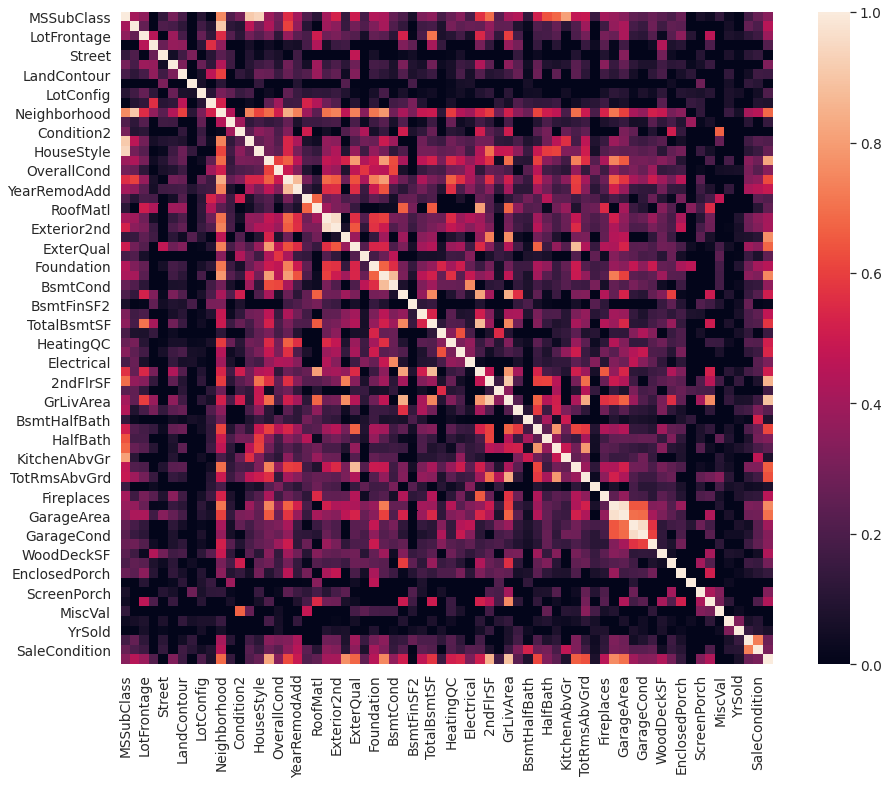

In [ ]:
phik_correlation_matrix = dataset.phik_matrix() #the phi_k correlation matrix between all variables
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(phik_correlation_matrix, vmax=1 , square=True)

I can visually infer from the Phik correlation heatmap that features such as **OverallQual, GrLivArea, 2ndFlrSF, MasVnrArea, BsmtQual, Neighbourhood, YearBuilt, FullBath, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF** fields decribe SalePrice field better


In [ ]:
correlation_cols = phik_correlation_matrix.nlargest(15,'SalePrice')['SalePrice'].index
print("The top 15 attributes that have high phik correlation score\n", correlation_cols.values)

The top 15 attributes that have high phik correlation score
 ['SalePrice' 'GrLivArea' '2ndFlrSF' 'OverallQual' 'MasVnrArea'
 'GarageCars' 'BsmtQual' 'GarageArea' 'Neighborhood' 'ExterQual'
 'KitchenQual' 'TotRmsAbvGrd' 'YearBuilt' 'FullBath' 'TotalBsmtSF']


That means these features play an **important role in determining the SalePrice** of a house. Similarly a lot can be inferred just by looking at the heatmap

###Remove Multicollinearity

I can also observe that there is **high correlation** within the fields(independent variables) 
* between GrLivArea and TotRmsAbvGrd
* between GarageArea and GarageCars<br>
* between 1stFlrSF and TotalBsmtSF<br>
This will lead to **multicollinearity** and linear model may struggle to identify the relationship between these features and SalePrice. 

If two explanatory variables are highly correlated, it's hard to tell, which affects the dependent variable. When SalePrice is regressed against GarageCars and GarageArea and here GarageCars and GarageArea are highly correlated. Then the effect of GarageCars on SalePrice is hard to distinguish from the effect of GarageArea on SalePrice because any increase in GarageCars tends to be associated with an increase in GarageArea.

Multicollinearity can undermine importance of a feature for any linear model. <br>So I am dropping one of those features.

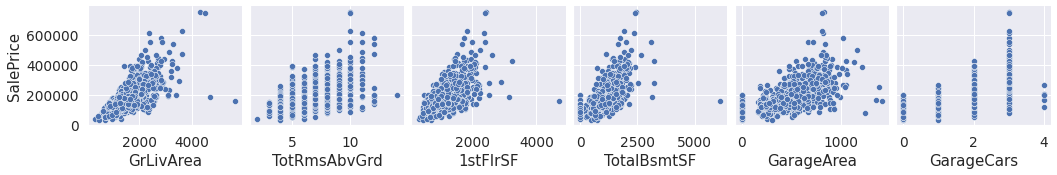

In [ ]:
fields = ['GrLivArea', 'TotRmsAbvGrd', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars']
sns.pairplot(x_vars = fields, y_vars = 'SalePrice', data = dataset)
plt.show()

I am going to **drop** the TotRmsAbvGrd, 1stFlrSF and GarageArea features as they have **less correlation** with the SalePrice compared to GrLivArea, TotalBsmtSF and GarageCars respectively.

In [ ]:
dataset.drop(['TotRmsAbvGrd', '1stFlrSF', 'GarageArea'], axis =1, inplace = True)

In [ ]:
correlation = dataset.corr(method = 'spearman')
correlatedColumns = correlation.SalePrice.sort_values(ascending=False).keys() 
print(correlatedColumns.tolist())

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'FullBath', 'TotalBsmtSF', 'YearRemodAdd', 'Fireplaces', 'OpenPorchSF', 'LotArea', 'MasVnrArea', 'WoodDeckSF', 'HalfBath', 'BsmtFinSF1', '2ndFlrSF', 'LotFrontage', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtUnfSF', 'ScreenPorch', 'MoSold', '3SsnPorch', 'PoolArea', 'MSSubClass', 'BsmtHalfBath', 'YrSold', 'BsmtFinSF2', 'MiscVal', 'LowQualFinSF', 'OverallCond', 'KitchenAbvGr', 'EnclosedPorch']


**Top 37 fields that are highly correlated *continuous data values* to the SalePrice field are printed above, I intend to analyse those fields individually against the SalePrice field**

**OverallQual(overall quality) has the highest correlation with SalePrice among the numeric variables**<br>
It rates the overall material and finish of the house on a scale from 1 (very poor) to 10 (very excellent).

I considered using ANOVA F-value to estimate features that are highly related to SalePrice. However, the main disadvantage of using ANOVA F-value is it only captures **linear relationships** between input and output feature.

### Mutual Information Scores

Hence, I proceeded with **Mutual information**, which describes relationships in terms of uncertainty.<br>
The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other.<br>

The advantage of **mutual information** is that it ***can detect any kind of relationship***, while correlation only detects linear relationships.

I am using scikit-learn algorithm for Mutual Information which treats discrete features differently from continuous features.

I am treating categoricals(object or categorial dtype) as discrete by giving them a label encoding.

In [ ]:
X = dataset.copy()
y = X.pop("SalePrice")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
discrete_features = X.dtypes == np.int64

In [ ]:
def mutual_information_scores(X, y, discrete_features):
    miScores = mutual_info_regression(X, y, discrete_features=discrete_features)
    miScores = pd.Series(miScores, name="Mutual Information Scores", index=X.columns)
    miScores = miScores.sort_values(ascending=False)
    return miScores

miScores = mutual_information_scores(X, y, discrete_features)
print("Top twenty fields that have high mutual information score")
print(miScores[:20])

Top twenty fields that have high mutual information score
OverallQual     0.567711
Neighborhood    0.530156
GrLivArea       0.432367
YearBuilt       0.412239
TotalBsmtSF     0.398537
LotArea         0.393960
GarageCars      0.375210
ExterQual       0.327219
KitchenQual     0.326690
BsmtQual        0.324050
MSSubClass      0.281081
YearRemodAdd    0.278506
FullBath        0.261812
LotFrontage     0.206314
Foundation      0.195374
OpenPorchSF     0.189287
Fireplaces      0.176928
2ndFlrSF        0.166264
HeatingQC       0.165334
Exterior2nd     0.159241
Name: Mutual Information Scores, dtype: float64


*'OverallQual', 'Neighborhood', 'GrLivArea', 'TotalBsmtSF', 'LotArea', 'GarageCars', 'MSSubClass', 'FullBath', 'TotRmsAbvGrd', 'BsmtQual', 'ExterQual', 'KitchenQual', 'GarageFinish', 'FireplaceQu', 'GarageType', 'YearBuilt', 'YearRemodAdd', 'YrSold'* have **high mutual information** scores to 'SalePrice'

I see that **OverallQual, Neighborhood, GarageArea, GrLivArea, YearBuilt and   TotalBsmtSF** has relatively greater potential predict the SalePrice.

In [ ]:
print("Top fields that have least mutual information score")
print(miScores[50:])

Top fields that have least mutual information score
Functional      8.489012e-03
LowQualFinSF    6.382282e-03
BsmtHalfBath    6.346782e-03
RoofMatl        5.335391e-03
LandSlope       4.218075e-03
Condition2      3.091146e-03
3SsnPorch       2.746120e-03
MiscVal         5.775702e-04
Street          1.612615e-04
Utilities       1.887379e-15
PoolArea        2.220446e-16
BsmtFinSF2      0.000000e+00
MoSold          0.000000e+00
YrSold          0.000000e+00
Name: Mutual Information Scores, dtype: float64


I see that **Basement Full Bath, Utilities, LotConfig, PoolArea** etc have less influence on the SalePrice. <br>
**MiscVal** and **MoSold** have no influence on SalePrice.

###Exploratory Data Analysis

**Exploratory Data Analysis to understand how the categorical variables in our dataset relate to the sale price of the house.**

To analyse the relationship between categorical variables and SalePrice, I am using seaborn’s boxplot (box-and-whisker plot)



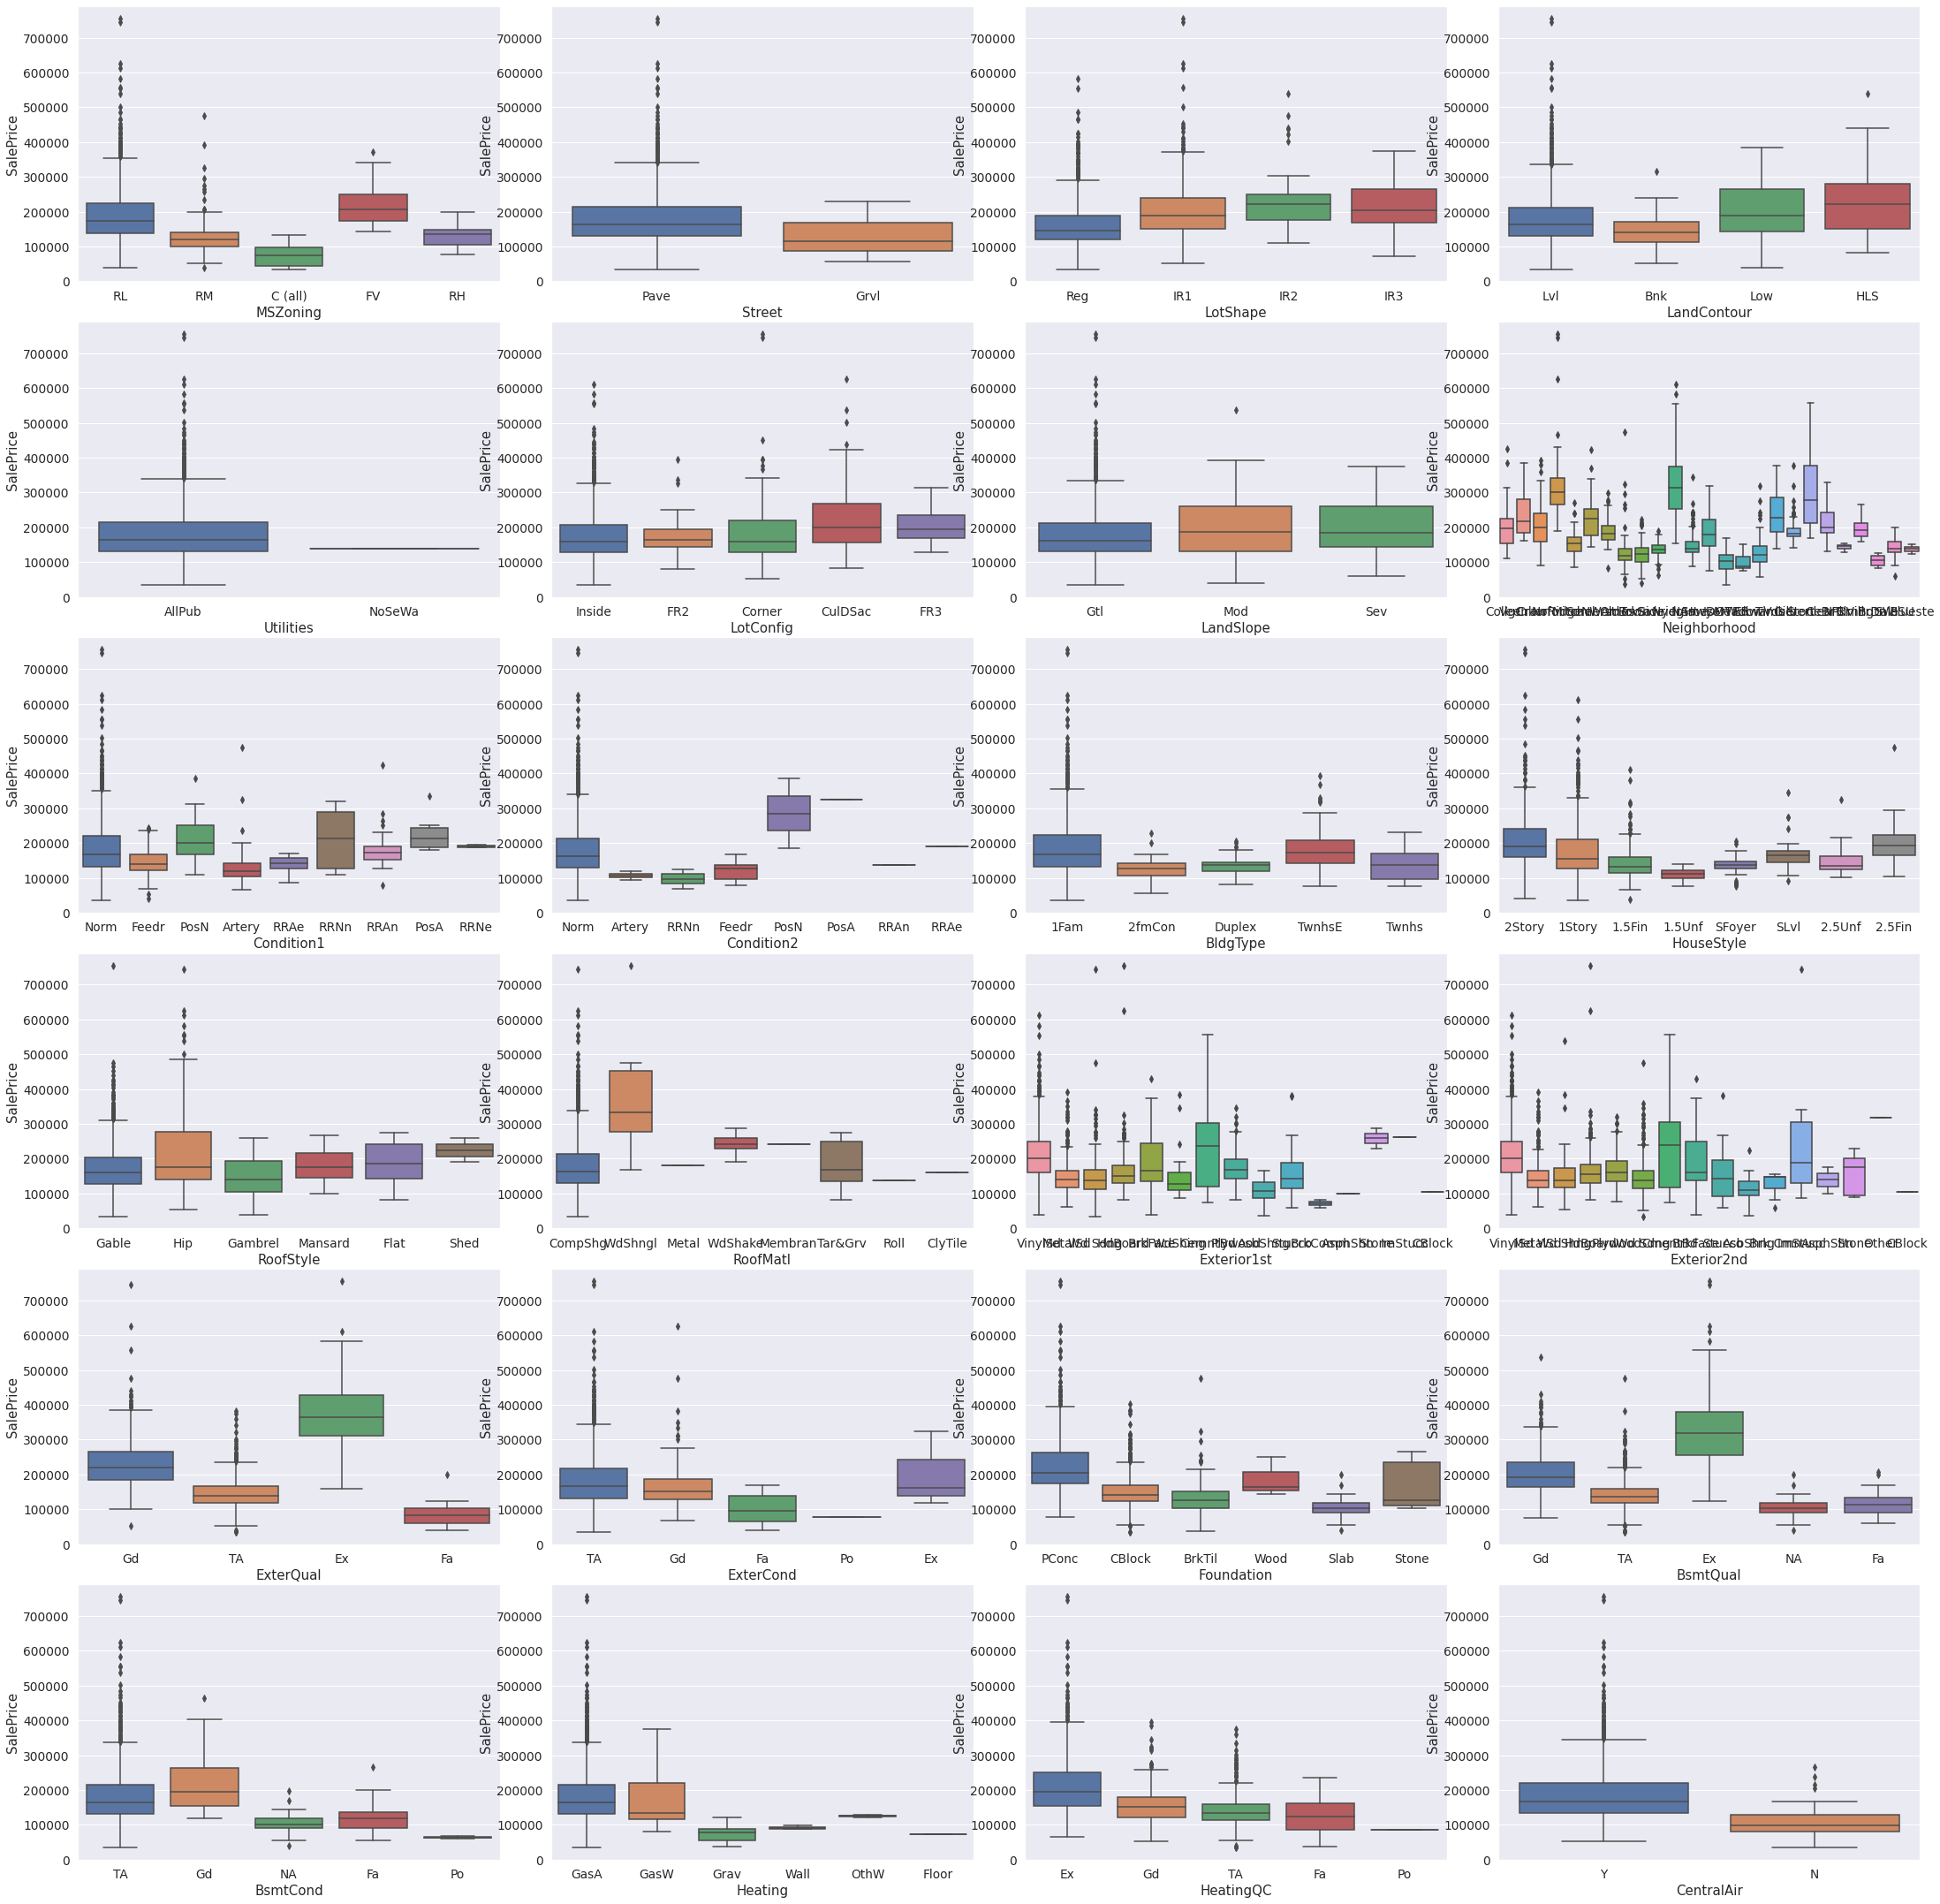

In [ ]:
fig, ax = plt.subplots(6, 4, figsize=(30, 30))
plt.subplots_adjust(wspace=0.9, hspace=0.9)
fig.tight_layout()
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=dataset, ax=subplot)

* **Excellent Quality(ExterQual, BsmtQual, HeatingQC etc) and Condition(GarageCond etc) variables implies an increase in SalePrice**
* Also *Neighbourhoods* affect the SalePrice of the house (should analyse them closely)
* *Roof material, Roof style* has a good influence on SalesPrice
* Houses with *paved street, Floating Village Residential zoning, Central air conditioning* have higher price

**Analyzing neighbourhoods and SalePrice**

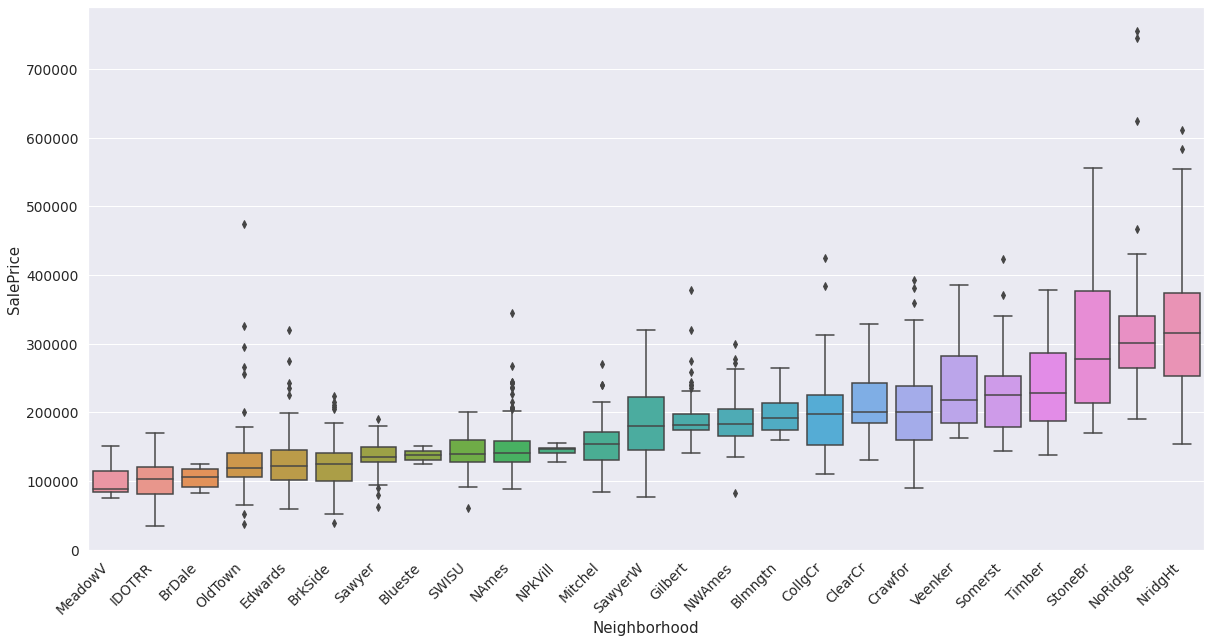

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sorted_nb = dataset.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
plt.xticks(rotation=45, ha='right')
sns.boxplot(x = dataset['Neighborhood'], y = dataset['SalePrice'], order = list(sorted_nb.index))

**Neighbourhoods such as NridgHt, NoRidge, StoneBr are expensive**<br>
There is wide dispersion of median Sale Prices in some neighbourhoods like StoneBr, NridgHt, veenker, SawyerW 

I decided to get rid of features that do not correlate to SalePrice -> helps in encoding the categoricals better without massively increasing dimensionality

In [ ]:
dataset.drop(['Utilities', 'RoofMatl', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Exterior2nd', 'Heating', 'LowQualFinSF','Functional', 'MoSold', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],axis=1, inplace=True)

**Visualizing the relationship between Sale prices and Overall Quality**

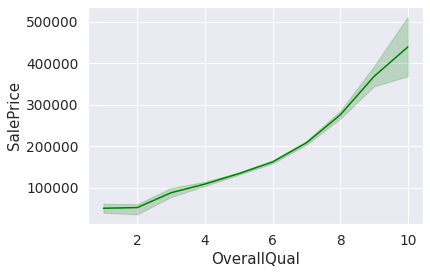

In [ ]:
sns.lineplot(x='OverallQual', y='SalePrice', color='green',data=dataset)

**I see that SalePrice and OverallQual are postively correlated -> Price of houses increases as Overall Quality increases**<br>
I can see that the SalePrices increase rapidly with houses with better overall quality which is pretty reasonable.

**Visualizing the relationship between Sale prices and Year Built**

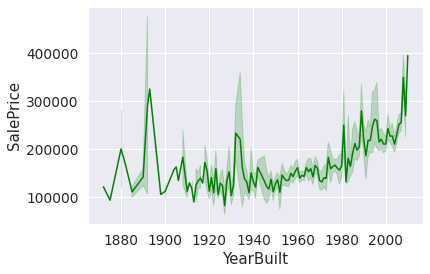

In [ ]:
sns.lineplot(x='YearBuilt', y='SalePrice', color='green', data=dataset)

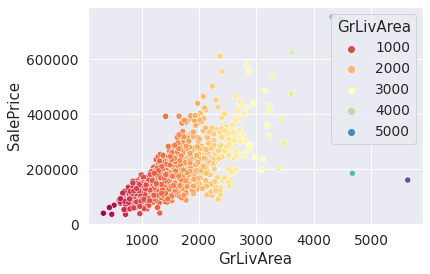

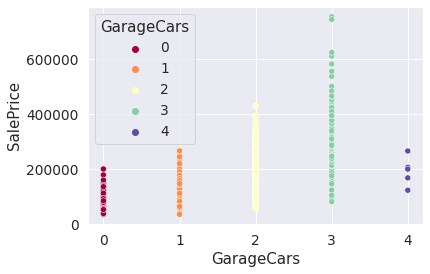

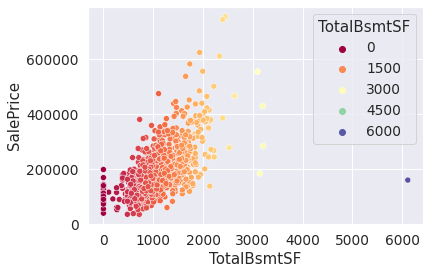

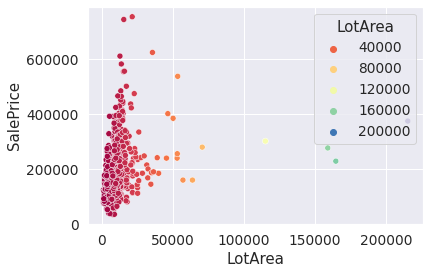

In [ ]:
sns.scatterplot(y = dataset.SalePrice, x = dataset['GrLivArea'], hue=dataset.GrLivArea, palette= 'Spectral')
plt.show()
sns.scatterplot(y = dataset.SalePrice, x = dataset['GarageCars'], hue=dataset.GarageCars, palette= 'Spectral')
plt.show()
sns.scatterplot(y = dataset.SalePrice, x = dataset['TotalBsmtSF'], hue=dataset.TotalBsmtSF, palette= 'Spectral')
plt.show()
sns.scatterplot(y = dataset.SalePrice, x = dataset['LotArea'], hue=dataset.LotArea, palette= 'Spectral')
plt.show()

**After analysing the 'OverallQual', 'GrLivArea', 'LotArea' using scatterplots I can observe that**

*   There are few houses that have living area > 4000 sq. feet but the salePrice is lesser that 200k
*   Sales price increases slowly as garage area increases



The plots confirm the high correlation between GrLivArea, OverallQual and SalePrice.

# Feature Engineering 
Adding new features by analysis and combination of existing features

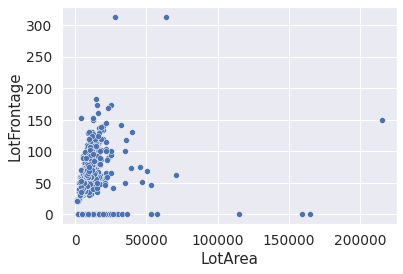

In [ ]:
# LotArea is in square feet and LotFrontage is in feet 
sns.scatterplot(y = dataset['LotFrontage'], x = dataset['LotArea'], palette= 'Spectral')
plt.show()

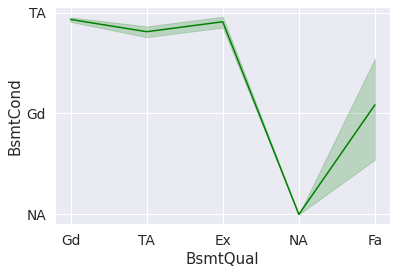

In [ ]:
sns.lineplot(x='BsmtQual', y='BsmtCond', color='green',data=dataset)
plt.show()

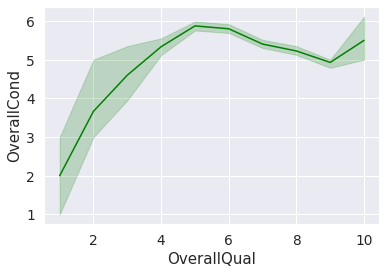

In [ ]:
# Although OverallCond and OverallQual rating ranges from 1(very poor) and 10(Very Excellent), they aren't in a linear relationship 
sns.lineplot(x='OverallQual', y='OverallCond', color='green',data=dataset)
plt.show()

In [ ]:
print("Total number of variables choosen is:", len(dataset.columns.values))
print("The variables choosen include: \n", dataset.columns.values)

Total number of variables choosen is: 47
The variables choosen include: 
 ['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1'
 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'RoofStyle' 'Exterior1st' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'TotalBsmtSF'
 'HeatingQC' 'CentralAir' 'Electrical' '2ndFlrSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'KitchenQual' 'Fireplaces' 'GarageCars' 'GarageQual'
 'PavedDrive' 'YrSold' 'SaleType' 'SaleCondition' 'SalePrice']


**As of now the dataset contains 46 important features for predicting salePrice from the original dataset.**

###Engineering new features

####Bathrooms
There is FullBath and HalfBath features indicating number of bathrooms for basement and above grade. Combining the features to indicate total baths in basement and above.

In [ ]:
dataset['TotalBasementBath'] = dataset['BsmtFullBath'] + 0.5*dataset['BsmtHalfBath']
dataset.drop(['BsmtFullBath', 'BsmtHalfBath'], 1, inplace = True)
dataset['TotalGradeBath'] = dataset['FullBath'] + 0.5*dataset['HalfBath']
dataset.drop(['FullBath', 'HalfBath'], 1, inplace = True)

####HouseAge

In [ ]:
dataset['HouseAge'] = dataset['YrSold'] - dataset['YearBuilt']
dataset.drop(['YearBuilt', 'YrSold'], 1, inplace = True)

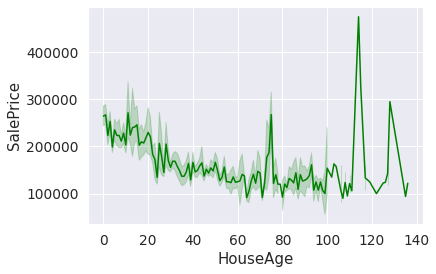

In [ ]:
sns.lineplot(x='HouseAge', y='SalePrice', color='green',data=dataset)

The SalesPrice seems to decrease with increase in house age till it is 100 years old. However, houses that are 120 years old are significantly higher priced.

# Conclusion from first contribution

**After analyzing the dataset features using *Spearman correlation*, *Phik correlation*, *mutual information* and visualizing using scatterplots, I can conclude that Overall quality of a house best describes the Sale price of a house**

**<u>OverallQual</u> field in dataset.csv best describes the SalePrice field.** 

# Second Contribution

# Analysing Data Distribution

###Visualizing skewness of important features

**The most important variable here is the target variable SalePrice.** -> Check its distribution.<br>
**Histogram** depicts the probability density at different values in a continuous variable here, **SalePrice.**


Skewness for Sales price data is:  1.880940746034036


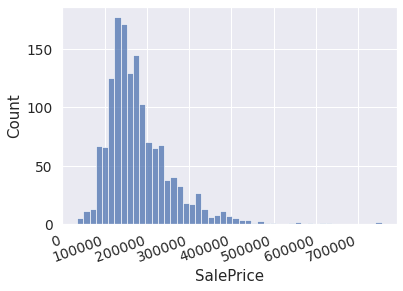

In [ ]:
sns.histplot(dataset['SalePrice'])
plt.xticks(rotation=20, ha='right')
print( '\nSkewness for Sales price data is: ', skew(dataset['SalePrice']))

Most house saleprice range between 100k to 300k dollars.<br>
Few houses cost 580k to 750k(5 extreme values), some houses cost as less as 35k <br>
The histogram makes it clear that the distribution is distinctly skewed, not normal. <br>This suggests that the dataset contains many outliers. <br>
**The target variable, SalePrice, is positively skewed and heavy-tailed distribution.**<br>
Skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution.


Skewness for Overall Quality is:  0.2167209765258641


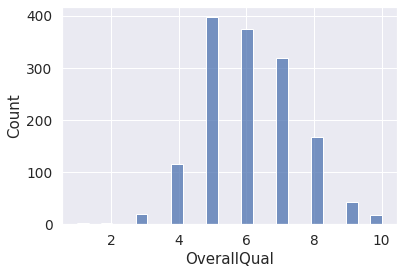

In [ ]:
sns.histplot(dataset['OverallQual']) #Overall Quality
print('\nSkewness for Overall Quality is: ', skew(dataset['OverallQual']))


Skewness for living area is:  1.365155954773434


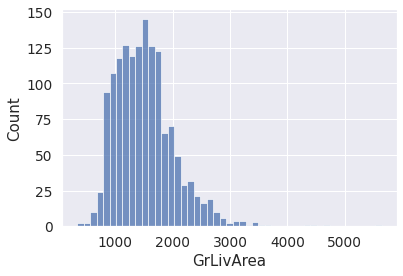

In [ ]:
sns.histplot(dataset['GrLivArea']) # Ground living area
print( '\nSkewness for living area is: ', skew(dataset['GrLivArea']))

Since skewed data can affect our machine learning model’s predicting capabilities, it is better to transform the skewed data to normally distributed data. Some of the ways to transform the skewed data:

Power Transformation<br>
Log Transformation<br>
Exponential Transformation<br>

**Since SalePrice is positively skewed I can take Log Transformation(log transformation works fine with positive skewness)** after which the SalePrice will follow normal distribution.

**Important features such as Total basement, OverallQual, YearBuilt, GrLivArea, LotFrontage could also be log transformed**

###Transformation of skewed datafields

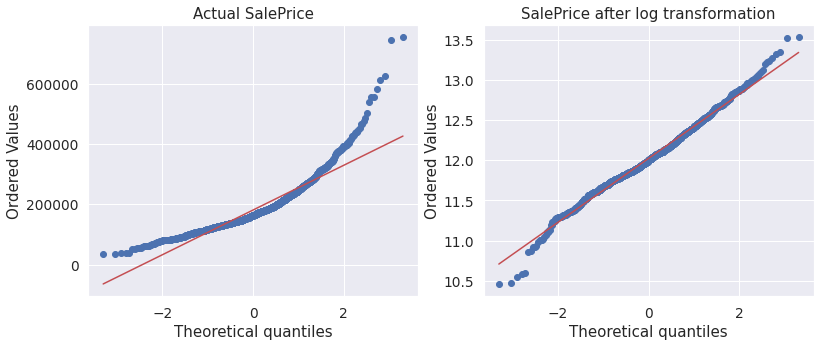

In [ ]:
figure = plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
probplot(dataset.SalePrice, plot = plt)
plt.title('Actual SalePrice')
plt.subplot(1,2,2)
dataset.SalePrice = np.log(dataset.SalePrice)
probplot(dataset.SalePrice, plot = plt)
plt.title('SalePrice after log transformation')
plt.show()

**This transformation can help improve the linear model’s performance.**

I think it is better to remove skewness first by applying transformation like log and then remove outliers. That way lesser number of data points will be removed.

In [ ]:
# # Applying log tranformation for other important features such as GrLivArea, OverallQual and LotArea 
# dataset.GrLivArea = np.log(dataset.GrLivArea)
# dataset.OverallQual = np.log(dataset.OverallQual)
# dataset.LotArea = np.log(dataset.LotArea)

# Handling Outliers in the dataset


**I see that living area, lot area, total basement area are positively correlated to SalePrice but have outliers**

Outliers are observations which do not follow the pattern of the other observations. Outliers can skew regression models sharply

In [ ]:
dataset = dataset.loc[~(dataset.GrLivArea >4000)] # there are two outliers in the GrndLivArea and I am going to remove them 
dataset.reset_index(drop=True, inplace=True)

###Z-score

Using z-score to filter outliers that are three standard deviations alway from the mean resulted in a huge loss of data. <br>
**Hence, based on analysis of the dataset above and the most important features that describes the SalesPrice, I can use scatter plot for the most important features to understand the outliers and then just remove them.** 

Considering only certain important features and removing observations that are either under or above 3 standard deviations away from their respective mean values.

In [ ]:
z_scores = zscore(dataset[['OverallQual','GarageCars', 'TotalBsmtSF','LotArea', 'SalePrice']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
dataset = dataset[filtered_entries]

In [ ]:
dataset.reset_index(drop=True, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1428 non-null   int64  
 1   MSZoning           1428 non-null   object 
 2   LotFrontage        1428 non-null   float64
 3   LotArea            1428 non-null   int64  
 4   Street             1428 non-null   object 
 5   LotShape           1428 non-null   object 
 6   LandContour        1428 non-null   object 
 7   LotConfig          1428 non-null   object 
 8   LandSlope          1428 non-null   object 
 9   Neighborhood       1428 non-null   object 
 10  Condition1         1428 non-null   object 
 11  Condition2         1428 non-null   object 
 12  BldgType           1428 non-null   object 
 13  HouseStyle         1428 non-null   object 
 14  OverallQual        1428 non-null   int64  
 15  OverallCond        1428 non-null   int64  
 16  YearRemodAdd       1428 

# Feature Selection 
**I have choosen 43 predictors/variables to predict the Sale Price of a house**<br> 
It is a combination of **26** categorical and **17** numerical variables.<br>
Reducing number of features from 80 to 43 could reduce the chances of overfitting without loss of important information<br>
Feature selection includes: 
* Selecting features that are highly correlated to SalePrice like OverallQual, neighbourhood, livingArea etc **->** determined by using **spearman correlation**, **mutual information scores**, visual analysis of scatter and box plots
* Removal of collinear variables that negatively affects model performance and decrease generalization performance on the test set
* Dropping columns that have more than 95% missing values and those that have no influence on the SalePrice 
* Three newly engineered features - Total Bathrooms in basement and above grade, house age.


In [ ]:
print("The variables choosen include: \n", dataset.columns.values)

The variables choosen include: 
 ['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1'
 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual' 'OverallCond'
 'YearRemodAdd' 'RoofStyle' 'Exterior1st' 'MasVnrArea' 'ExterQual'
 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'TotalBsmtSF' 'HeatingQC'
 'CentralAir' 'Electrical' '2ndFlrSF' 'GrLivArea' 'BedroomAbvGr'
 'KitchenAbvGr' 'KitchenQual' 'Fireplaces' 'GarageCars' 'GarageQual'
 'PavedDrive' 'SaleType' 'SaleCondition' 'SalePrice' 'TotalBasementBath'
 'TotalGradeBath' 'HouseAge']


# Encoding all categorical variables in the dataset
There are numerous ‘objects’ in the data, which will need to be transformed to numeric values in order to be used further for Machine Learning models.

In [ ]:
print("Total number of fields present in the dataset after dropping unnecessary columns and before encoding categoricals is ", dataset.shape[1])

Total number of fields present in the dataset after dropping unnecessary columns and before encoding categoricals is  44


Various **quality** and **condition** features like KitchenQual have five ratings<br>
       **Ex**	Excellent <br>
       **Gd**	Good <br>
       **TA**	Typical/Average <br>
       **Fa**	Fair <br>
       **Po**	Poor <br>
converting the ordinal features to numerical based on their importance



**Totally there are 43 categorical variables in the dataset which are mix of binary(dichotomous variables), nominal(no order) and ordinal(specific order)**

*They range from 2 to 28 classes with the smallest being 'Street' (gravel or paved) and the largest being 'Neighborhood' (areas within the Ames city limits)*

*   **Binary:  1**  ['CentralAir']
*   **Nominal: 23** ['MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']
*   **Ordinal: 19** ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']<br>

Some categorical features like Alley, Fence are already dropped  






In [ ]:
s = (dataset.dtypes == 'object')
object_cols = list(s[s].index)

print("There are", len(object_cols), "categorical variables.")
print(object_cols)

There are 26 categorical variables.
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
# binary  = ['CentralAir']
# nominal = ['MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']
# ordinal = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

In [ ]:
# Using SciKit-learn's LabelEncoder to convert categorical values into numerical values.
# In this technique, each label is assigned a unique integer based on alphabetical ordering.
# Lable Encoding works best for ordinal features(there are 19 ordinal). Since the number of nominal categories(there are 23) is quite large -> one-hot encoding can lead to high memory consumption

# nominal_cols_ind = []
# for col in nominal:
#     nominal_cols_ind.append(dataset.columns.get_loc(col))

# encoder = LabelEncoder() # define label encoder
# for i in nominal_cols_ind:
#    dataset.iloc[:,i] = encoder.fit_transform(dataset.iloc[:,i])

# ordinal_cols_ind = []
# for col in ordinal:
#     ordinal_cols_ind.append(dataset.columns.get_loc(col))

# encoder = OrdinalEncoder() # define ordinal encoding
# for i in ordinal_cols_ind:
#    dataset.iloc[:,i] = encoder.fit_transform(dataset.iloc[:,i])


# print("Categorical variables:")
# print(object_cols)

#### Encoding **ordinal** categories

In [ ]:
map = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
for column in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC', 'KitchenQual','GarageQual']:
    dataset[column] = dataset[column].map(map) 

In [ ]:
map = {'N':0, 'Y':2 , 'P':1}
for column in ['CentralAir', 'PavedDrive']:
    dataset[column] = dataset[column].map(map)

In [ ]:
map = {'Gtl':1 ,'Mod':2 , 'Sev':3}
dataset['LandSlope'] = dataset['LandSlope'].map(map) 

###One Hot encoding for **nominal** features

Applying **get_dummies** method in Python 
Pandas module. 
It converts nominal categorical variables into 
dummy/indicator variables. 

In [ ]:
dataset = pd.get_dummies(dataset, drop_first=True)

Since one of the columns can be generated completely from the others after performing One Hot encoding, hence I dropped the first column <br>
Removed generated 
new features with very few non zero values to avoid 
overfitting. 

In [ ]:
dataset.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 134 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1428 non-null   int64  
 1   LotFrontage            1428 non-null   float64
 2   LotArea                1428 non-null   int64  
 3   LandSlope              1428 non-null   int64  
 4   OverallQual            1428 non-null   int64  
 5   OverallCond            1428 non-null   int64  
 6   YearRemodAdd           1428 non-null   int64  
 7   MasVnrArea             1428 non-null   float64
 8   ExterQual              1428 non-null   int64  
 9   ExterCond              1428 non-null   int64  
 10  BsmtQual               1428 non-null   int64  
 11  BsmtCond               1428 non-null   int64  
 12  TotalBsmtSF            1428 non-null   int64  
 13  HeatingQC              1428 non-null   int64  
 14  CentralAir             1428 non-null   int64  
 15  2nd

The **dataset is ready** to be fitted using Machine Learning models to predict the SalePrice. 

**Randomly splitted the dataset into a ratio of 75% for training and 25% for testing using Scikit-learn's train_test_split module**(randomized the splitting of data by using random_state)

I am using train data to train machine learning models and test data to see if it has learnt the data well or not. If I split the dataset into three parts like train, test, and validation set then I believe my model will underfit, as there is very less train data and it may not find all the pattern in the train data

In [ ]:
train, test = train_test_split(dataset, test_size= 0.25, random_state=42, shuffle=True)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

X_train = train.drop(['SalePrice'], axis = 1)
Y_train = train['SalePrice']
X_test  = test.drop(['SalePrice'], axis = 1)
result = pd.DataFrame()
result['Actual'] = test['SalePrice']

In [ ]:
print("Training data:", train.shape)
print("Testing data:", test.shape)

Training data: (1071, 134)
Testing data: (357, 134)


# Feature scaling

The values in different features are at different scales. Initially I normalized the features using StandardScalar function from scikit learn. <br>It transformed the data such that its distribution had a mean value 0 and standard deviation of 1.

After trying with/without feature scaling, I found out that XGBoost, Decision Tree, Random Forest (Tree based models) can handle features with varying ranges, and **do not require scaling**.

In [ ]:
# train_fields = [var for var in X_train.columns if var not in ['SalePrice']]

In [ ]:
# #fitting the scaler to the training data
# scaler = StandardScaler() 
# X_train[train_fields] = scaler.fit_transform(X_train[train_fields])
# X_test[train_fields] = scaler.transform(X_test[train_fields])

# Choice of model technique used 

Since the aim is to predict the house sales price (continuous values) from various characteristics of the house, **regression** approach makes most sense<br>

I aim to consider regressors that can handle the different data types natively, in addition to those that only handle numeric covariates.<br>
Also must maintain a balance between **regularity** and **overfitting**.

## Baseline model

I am starting with the simplest and most straightforward method, **simple linear regression** in sklearn package to fit the training data. It doesn't have any hyperparameters

###**Linear Regression Model**

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
result["linear_reg"] = linear_reg.predict(X_test)
Y_pred_train   = linear_reg.predict(X_train)
print("RMSE of Linear Regressor on training data: {}".format(mean_squared_error(np.exp(Y_train), np.exp(Y_pred_train), squared=False)))
print("RMSE of Linear Regressor on testing data: {}".format(mean_squared_error(np.exp(result["Actual"]), np.exp(result['linear_reg']), squared=False)))

RMSE of Linear Regressor on training data: 17981.0584185274
RMSE of Linear Regressor on testing data: 20185.320400485605


**I am using Root Mean Squared Error (RMSE)** between the predicted sales price and the observed sales price to evaluate the model. RMSE is commonly used metric to evaluate regression models.

I have applied **log transformation** on target variable(SalePrice) during data preprocessing to handle skewed distribution -> I have applied inverse function on top of the predicted values to get the actual predicted target value

In [ ]:
print('The R² score for the baseline linear regression model is', r2_score(np.exp(result["Actual"]), np.exp(result["linear_reg"])))

The R² score for the baseline linear regression model is 0.9216556553302898


The **R² score** shows how much the model is able to **explain the variation** in the dataset. It tells *how well the regression model fits the training data*. <br>Having a score of 0.92 indicates that the model can explain 92% of the variation in the dataset.


In [ ]:
print('The cross validated score for the baseline linear regresion model is', np.mean(cross_val_score(linear_reg, X_train, Y_train, n_jobs = 1, cv = 5)))

The cross validated score for the baseline linear regresion model is 0.8969448127950536


**Plotting actual saleprice against saleprice predicted by simple linear regression model**

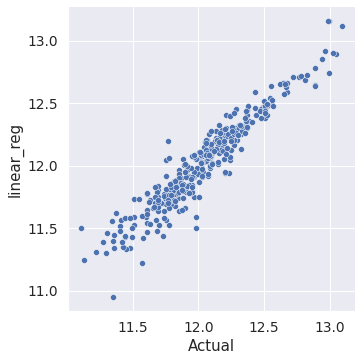

In [ ]:
sns.relplot(x="Actual", y="linear_reg", data = result)

The **log transformation of SalePrice**, has significantly improved the simple baseline model.

**The baseline model has a cross validated score of 0.89, which is good at predicting the house price.**


## **Ridge Regression**

To reduce overfitting of the linear regression model, I am using **Ridge regularization**, a common regularization techniques.This technique **uses cross validation** to reduce the beta values of the regression model, trading off a lower R squared value for higher predictive power. <br>Ridge regression and lasso both add a regularization term to linear regression; <br>

Using *Ridge* function in *skLearn package*, it helps fit regularized linear regression model. Grid Search approach is used to evaluate different alpha values to estimate the best alpha value for the Ridge Regression algorithm.

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
ridge = Ridge()
ridge_reg = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_squared_error', cv = 5, return_train_score=True, verbose = 1)            
ridge_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 9.0}
-0.013152267705360515


In [ ]:
Y_pred_train   = ridge_reg.predict(X_train)
result["ridge_reg"]  = ridge_reg.predict(X_test)

In [ ]:
print("RMSE of Ridge Regression on training set: {}".format(mean_squared_error(np.exp(Y_train), np.exp(Y_pred_train), squared=False)))
print("RMSE of Ridge Regression on test set: {}".format(mean_squared_error(np.exp(result["Actual"]), np.exp(result["ridge_reg"]), squared=False)))

RMSE of Ridge Regression on training set: 18544.576409244797
RMSE of Ridge Regression on test set: 19740.31382586296


In [ ]:
print('The R² score for the Ridge regression model is', r2_score(np.exp(result["Actual"]), np.exp(result["ridge_reg"])))

The R² score for the Ridge regression model is 0.9250719443774404


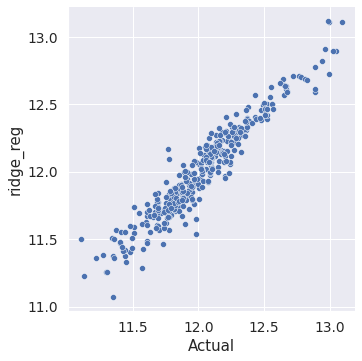

In [ ]:
sns.relplot(x="Actual", y="ridge_reg", data = result)

**Comparing the regularized model with the original linear regression model, the cross validation score improved from 88% to 91%.**

**Residual Plot of Ridge Regressor**

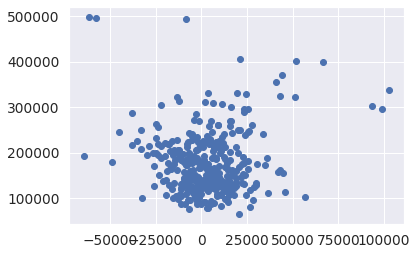

In [ ]:
residuals = np.exp(result["Actual"]) - np.exp(result["ridge_reg"])
plt.scatter(residuals,np.exp(result["ridge_reg"]))
plt.show()

They are pretty symmetrically distributed, tending to cluster towards the middle of the plot and are clustered around 180k<br>


##Random Forest Regressor
Random Forests models are able to easily handle categorical, numerical and binary features without scaling or normalization. They also help in performing implicit feature selections as they provide good indicators of the important features.

I am using the **Randomized Grid Search** method to search the best hyperparameters for the Rondom Forest Model 

In [ ]:
# n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
# max_features = [0.5,'auto', 'sqrt','log2']
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# m = RandomForestRegressor()
# random_forest = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# random_forest.fit(X_train, Y_train)

From the **Randomized Grid Search**, I found that the most optimized hyperparameters for the Random Forest Model is

*   n_estimators = 1800
*   max_features=0.5
*   min_samples_leaf = 0.5



In [ ]:
random_forest = RandomForestRegressor(n_estimators=1800, max_depth=15, min_samples_split=5, min_samples_leaf=1, max_features=0.5, random_state=42, oob_score=True)
random_forest.fit(X_train, Y_train)
result["random_forest"]  = random_forest.predict(X_test)
print("RMSE of Random Forest Regressor: {}".format(mean_squared_error(np.exp(result["Actual"]), np.exp(result['random_forest']), squared=False)))

RMSE of Random Forest Regressor: 22556.84475884634


 The model's accuracy is improved by **tuning the hyper-parameters** such as **n_estimators** and **max_depth**

In [ ]:
print('The cross validated score for the Random Forest Regressor is', np.mean(cross_val_score(random_forest, X_train, Y_train, n_jobs = 1, cv = 5)))

The cross validated score for the Random Forest Regressor is 0.8738921000846591


In [ ]:
print('The R² score for the Random forest model is', r2_score(result["Actual"], result["random_forest"]))

The R² score for the Random forest model is 0.909519271555207


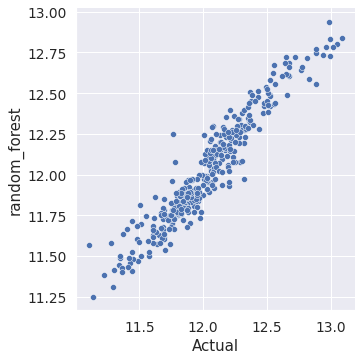

In [ ]:
sns.relplot(x="Actual", y="random_forest", data = result)

##XG Boost

XGBoost is usually effective in producing a model with lesser variance and a more stable prediction.

In [ ]:
xg_boost = XGBRegressor( learning_rate=0.01, n_estimators=6000, max_depth=4, min_child_weight=1, gamma=0.6, subsample=0.7, colsample_bytree=0.2, objective='reg:squarederror', nthread=-1, scale_pos_weight=1, seed=27, reg_alpha=0.00006)
xg_boost.fit(X_train, Y_train)
result["xg_boost"]  = xg_boost.predict(X_test)
print("RMSE of XG Boost: {}".format(mean_squared_error(np.exp(result["Actual"]), np.exp(result['xg_boost']), squared=False)))

RMSE of XG Boost: 26834.477403746223


In [ ]:
print('The cross validated score for XG Boost is', np.mean(cross_val_score(xg_boost, X_train, Y_train, n_jobs = 1, cv = 5)))

The cross validated score for XG Boost is 0.8550980843408242


In [ ]:
print('The R² score for the XG Boost model is', r2_score(result["Actual"], result["xg_boost"]))

The R² score for the XG Boost model is 0.8900830382800707


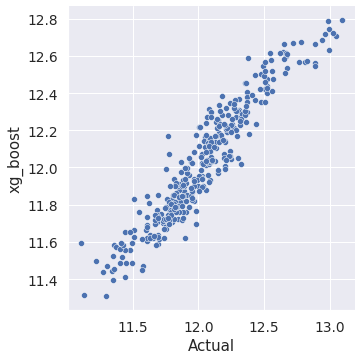

In [ ]:
sns.relplot(x="Actual", y="xg_boost", data = result)

##Gradient Boost Regressor(GBM)

Gradient boosting is one of the most powerful techniques for building predictive models. 

Gradient boosting is a greedy algorithm and can overfit a training dataset quickly. It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.<br>
* Using least squares regression as loss function to be optimized
* Setting n_estimator to 400, setting it to high will lead to overfitting

In [ ]:
g_boost = GradientBoostingRegressor( n_estimators=400, learning_rate=0.1, max_depth=5, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='ls', random_state =42)
g_boost.fit(X_train, Y_train)
Y_pred_train   = g_boost.predict(X_train)
result["g_boost"]  = g_boost.predict(X_test)
print("RMSE of training data Gradient Boost Regressor: {}".format(mean_squared_error(np.exp(Y_train), np.exp(Y_pred_train), squared=False)))
print("RMSE of test data Gradient Boost Regressor: {}".format(mean_squared_error(np.exp(result["Actual"]), np.exp(result['g_boost']), squared=False)))

RMSE of training data Gradient Boost Regressor: 9308.555522168685
RMSE of test data Gradient Boost Regressor: 20238.944518846183


In [ ]:
print('The cross validated score for Gradient Boost Regressor is', np.mean(cross_val_score(g_boost, X_train, Y_train, n_jobs = 1, cv = 5)))

The cross validated score for Gradient Boost Regressor is 0.8975053861607274


In [ ]:
print('The R² score for the Gradient Boosting Regressor model is', r2_score(result["Actual"], result["g_boost"]))

The R² score for the Gradient Boosting Regressor model is 0.92217158602163


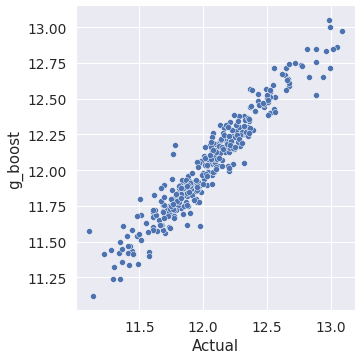

In [ ]:
sns.relplot(x="Actual", y="g_boost", data = result)

**The standalone Gradient Boosting Regressor model gives a good(low) RMSE on test data however overfits the training data**

##Model Stacking<br>
In order to generate a better quality prediction I have **stacked 4 models** - *Linear Regressor, Ridge Regressor, XGBoost and Gradient Boosting Regressor* as the multiple regressors of the first layer.  Used Gradient Boost as the second layer regressor, since it performed btter than the other separate models that I tried.

Stacking (also called meta ensembling) is a model ensembling technique used to combine information from multiple predictive models to generate a new model which usually performs better. 

I am using python package called **vecstack** that helps stack the models which are imported earlier. 

In [ ]:
models = [linear_reg, ridge_reg, g_boost, xg_boost]

In [ ]:
S_train, S_test = stacking(models, X_train, Y_train, X_test, regression=True, mode='oof_pred_bag', n_folds=5, random_state=25, shuffle = True)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.9s finished


In [ ]:
# Initializing Gradient Boost as the 2nd level model
gb_lev2 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500, max_depth=3, random_state=17, loss='ls')
gb_lev2.fit(S_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=17, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
result['stacked_pred'] = gb_lev2.predict(S_test)
Y_pred_train   = gb_lev2.predict(S_train)
print("RMSE of Stacked Model on train dataset: {}".format(mean_squared_error(np.exp(Y_train), np.exp(Y_pred_train), squared=False)))
print("RMSE of Stacked Model on test dataset: {}".format(mean_squared_error(np.exp(result["Actual"]), np.exp(result['stacked_pred']), squared=False)))

RMSE of Stacked Model on train dataset: 8259.40182185775
RMSE of Stacked Model on test dataset: 19765.898807149955


**The Stacked ensemble model fits the training data very well and but not the testing data i.e, overfits the data (low bias and high variance).**

In [ ]:
print('The cross validated score for Stacked Model is', np.mean(cross_val_score(gb_lev2, X_train, Y_train, n_jobs = 1, cv = 5)))

The cross validated score for Stacked Model is 0.8913746828421456


In [ ]:
print('The R² score for the stacked model is', r2_score(result["Actual"], result["stacked_pred"]))

The R² score for the stacked model is 0.9096324087090218


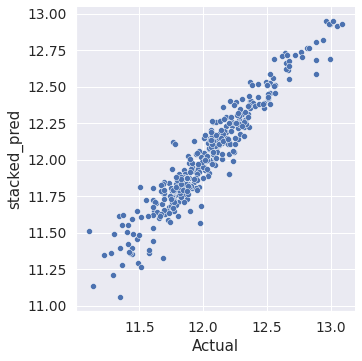

In [ ]:
sns.relplot(x="Actual", y="stacked_pred", data = result)

# Model Performance and validation.

In [ ]:
print("Mean of the original target values", np.exp(result["Actual"]).mean())
print("Mean of the predicted target values using Ridge Regressor", np.exp(result["ridge_reg"]).mean())
print("Mean of the predicted target values using Gradient Boosting Regressor", np.exp(result["g_boost"]).mean())
print("Mean of the predicted target values after stacking", np.exp(result["stacked_pred"]).mean())

Mean of the original target values 179612.96358543416
Mean of the predicted target values using Ridge Regressor 176401.3343742639
Mean of the predicted target values using Gradient Boosting Regressor 177275.63596353837
Mean of the predicted target values after stacking 176817.0296085753


In [ ]:
print("Median Sales Price of the house is", np.exp(result["Actual"]).median())

Median Sales Price of the house is 166000.00000000003


<table>
  <tr>
    <th>Model Explored</th>
    <th>Root Mean Squared Error</th>
    <th>R² Score</th>
    <th>Cross Validated Score</th>
    
  </tr>
  <tr>
    <td>Simple Linear Regressor</td>
    <td>20185.89</td>
    <td>0.92</td>
    <td>0.89</td>
  </tr>
  <tr>
    <td>Ridge Regressor</td>
    <td>19740.62</td>
    <td>0.92</td>
    <td>0.91</td>
  </tr>
  <tr>
    <td>Random Forest Regressor</td>
    <td>22412.86</td>
    <td>0.87</td>
    <td>0.90</td>
  </tr>
  <tr>
    <td>XG Boost</td>
    <td>26579.90</td>
    <td>0.85</td>
    <td>0.89</td>
  </tr>
  <tr>
    <td>Gradient Boost</td>
    <td>20282.02</td>
    <td>0.89</td>
    <td>0.92</td>
  </tr>
  <tr>
    <td>Stacked Ensemble</td>
    <td>19772.56</td>
    <td>0.89</td>
    <td>0.91</td>
  </tr>
</table>


I believe that the **Ridge Regression** model fits the data well.

The **Stacked Ensemble**, **Gradient Boost Regressor** model **overfits** the data as indicated by low RMSE in training dataset but, high RMSE in test set.

I have used simple models which generalizes well in most cases while can perform poorer in some extreme cases. 
<br>**Using Regularization(Ridge), dropping certain non-linear features, log transformation of skewed features and removal of outliers has reduced overfitting of data in Ridge Regression model.**


**The RMSE of predicted SalePrice of the Ridge Regression model is ~19k which I believe is considerable given that median SalePrice is $164k, hence I believe the model fits well. <br>
It has a R² score of 0.92 which indicates that the model can explain 92% of the variation in the dataset and a cross validated score of 0.91, which is good at predicting the house price.**

<u>**Hence, I would use the Ridge Regression model to predict the salePrice of any new house.**</u>

**Future enhancements:**<br>
* To make the model more robust we can perform **winsorization** to eliminate under-shooting(-ve prediction) and over-shooting(high +ve). 